In [ ]:
"""
pip install torch
pip install torchvision
pip install matplotlib
"""

# 准备数据
import torch
#from google.colab import drive
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('./mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('./mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


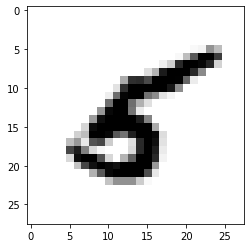

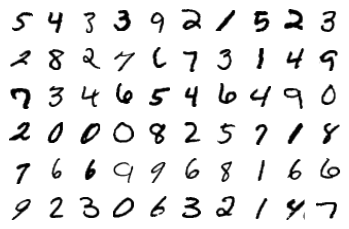

In [6]:
# 观察数据
import matplotlib.pyplot as plt

dataiter = iter(trainloader)
images, labels = next(dataiter)  # images [64, 1, 28, 28]，64 张，1 通道，28 宽，28 高 的图片  # labels [64] 64个标签
  # 28*28 = 784 个像素点，每张图片作为输入是[768] 的一维数组，每一批总共输入64 张，既是：[64, 784]
  # so, 输入层共784 个神经元结点，每个结点得到图片的其中一个像素作为输入
print(type(images))
print(images.shape)
print(labels.shape)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');  # squeeze 将 [1, 28, 28] 降维成 [28, 28]


"""
输入: images[0].numpy().squeeze()
可以看到数值范围是：-1.0 ~ +1.0
"""
# import pdb; pdb.set_trace() # 调试， exit 退出


figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)  # 绘制  6 行，10 列 个对象
    plt.axis('off')            # 关闭坐标轴显示
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')